# Project Name: `TINDER DATA`

### Project team members: 
- Tal Rubin
- Shani Shasha
- Nadav Barkan

## FEMALES VS MALES <div> <img src="https://thumbs.dreamstime.com/z/d-rendering-male-versus-female-gender-symbols-isolated-white-140332269.jpg" width="200"/> </div>

In [203]:
import pandas as pd
import plotly.express as px

file_url = "https://raw.githubusercontent.com/nadav103/app-project/refs/heads/main/Tinder_Data_v3_Clean_Edition.csv"
dating_df = pd.read_csv(file_url)

In [204]:
dating_df[['gender']].describe(include = 'object')

,gender
count,1209
unique,2
top,M
freq,1059


In [206]:
top_countries = (dating_df['country'].value_counts().head(10).index)
filtered_df = dating_df[dating_df['country'].isin(top_countries)]
count_by_gender = (filtered_df.groupby(['country', 'gender']).size().reset_index(name='count'))
count_by_gender

,country,gender,count
0,Australia,F,6
1,Australia,M,17
2,Canada,F,11
3,Canada,M,21
4,Finland,F,4
5,Finland,M,26
6,France,F,1
7,France,M,22
8,Germany,F,6
9,Germany,M,49


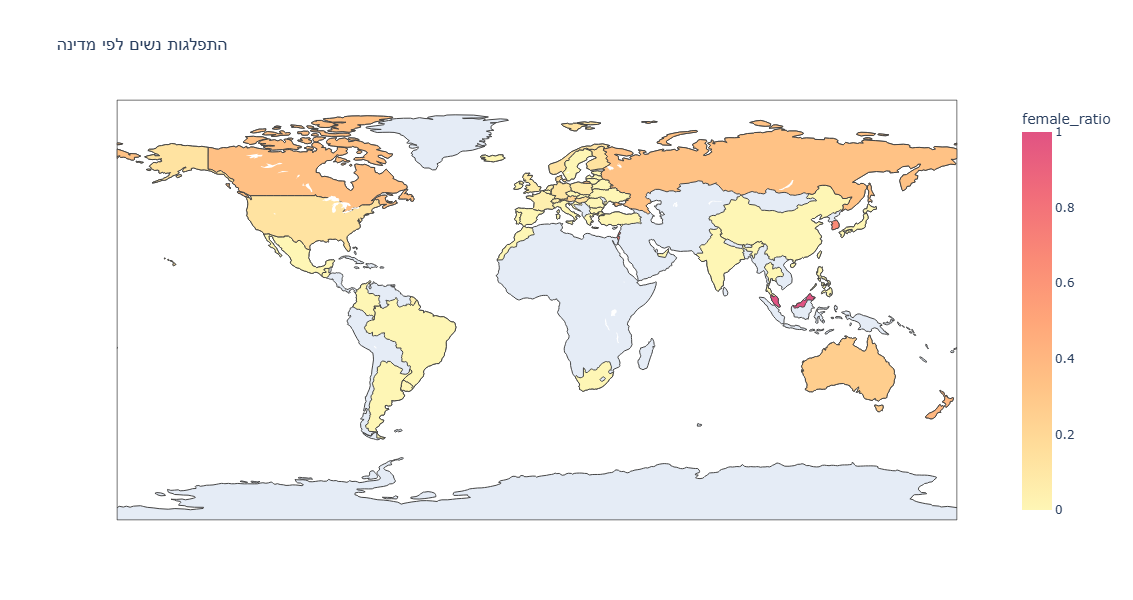

In [209]:
gender_dist = dating_df.groupby(['country', 'gender']).size().unstack(fill_value=0).reset_index()
gender_dist['total'] = gender_dist['M'] + gender_dist['F']
gender_dist['female_ratio'] = gender_dist['F'] / gender_dist['total']

import plotly.express as px

fig = px.choropleth(gender_dist.copy(),  locations="country",locationmode="country names",color="female_ratio",
    hover_name="country",hover_data=["F", "M", "total"],color_continuous_scale=px.colors.sequential.Pinkyl,title="התפלגות נשים לפי מדינה")
fig.update_layout(width=1000, height=600)
fig.show()

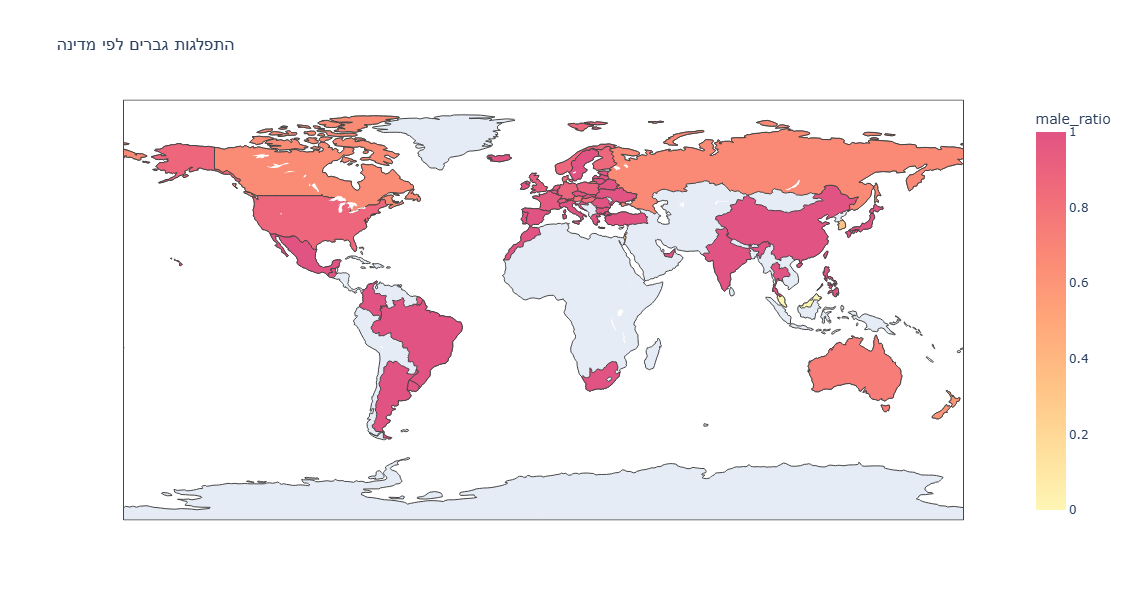

In [211]:
gender_dist = dating_df.groupby(['country', 'gender']).size().unstack(fill_value=0).reset_index()
gender_dist['total'] = gender_dist['M'] + gender_dist['F']
gender_dist['male_ratio'] = gender_dist['M'] / gender_dist['total']

import plotly.express as px

fig = px.choropleth(gender_dist.copy(),  locations="country",locationmode="country names",color="male_ratio",
    hover_name="country",hover_data=["F", "M", "total"],color_continuous_scale=px.colors.sequential.Pinkyl,
    title="התפלגות גברים לפי מדינה")
fig.update_layout(width=1000, height=600)
fig.show()

In [213]:
stat_by_gender = dating_df.groupby("gender").agg(num_of_users=('user_age', 'count'),
    avg_num_of_matches=('no_of_matches', 'mean'), avg_days_on_app = ('no_of_days', 'mean'),
    avg_num_of_likes_given = ('swipe_likes', 'mean')).reset_index()
stat_by_gender

,gender,num_of_users,avg_num_of_matches,avg_days_on_app,avg_num_of_likes_given
0,F,150,858.153333,297.760000,2324.433333
1,M,1059,497.463645,331.525024,16388.864967


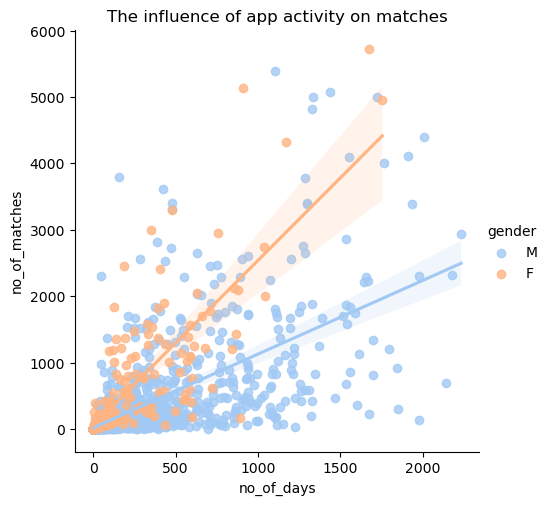

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns  
sns.__version__

filtered_df = dating_df[(dating_df['no_of_matches'] < 6000)]
sns.lmplot(data=filtered_df, x='no_of_days', y='no_of_matches', hue='gender', palette='pastel')
plt.title('The influence of app activity on matches')
plt.show()


#### מסקנה ראשונה: 
כמות הגברים המשתמשים באפליקציה גדולה משמעותית מכמות הנשים, דבר אשר ניתן לראות בהיבט החלוקה העולמית

למרות שגברים יותר פעילים באפליקציה (מתן לייקים, כמות ימי שימוש באפליקציה) , עדיין נשים מקבלות פי 2 התאמות

## The conecction between age and success 
<div> <img src= "https://th.bing.com/th/id/OIP.kugYVMcwCCzLjaRekZDlAAHaGK?rs=1&pid=ImgDetMain" width="200"/> </div>

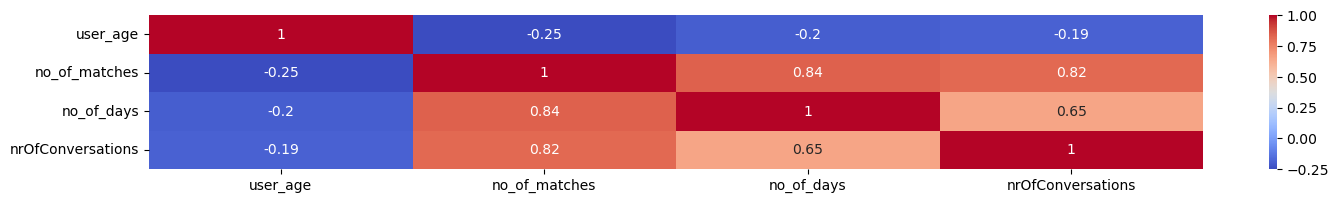

In [219]:
selected_columns1 = ['user_age', 'no_of_matches', 'no_of_days', 'nrOfConversations']
correlation_dating = dating_df[selected_columns1].corr(method = 'spearman' ).round(2)
plt.figure(figsize=(17,2))
sns.heatmap(data=correlation_dating,cmap='coolwarm', annot=True)
plt.show()

הגיל לא מאוד משפיע יש מגמה חלשה של ירידה בפעילות או בהצלחה ככל שהגיל עולה

משך הזמן באפליקציה קשור בצורה חזקה עם כמות ההתאמות והשיחות

הקשרים בין התאמות, ימים ושיחות מאוד חיוביים - יש הקשר ברור בין שימוש לאורך זמן לבין אינטראקציות

C:\Users\97254\AppData\Local\Temp\ipykernel_21708\1839801752.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\97254\AppData\Local\Temp\ipykernel_21708\1839801752.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\97254\AppData\Local\Temp\ipykernel_21708\1839801752.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




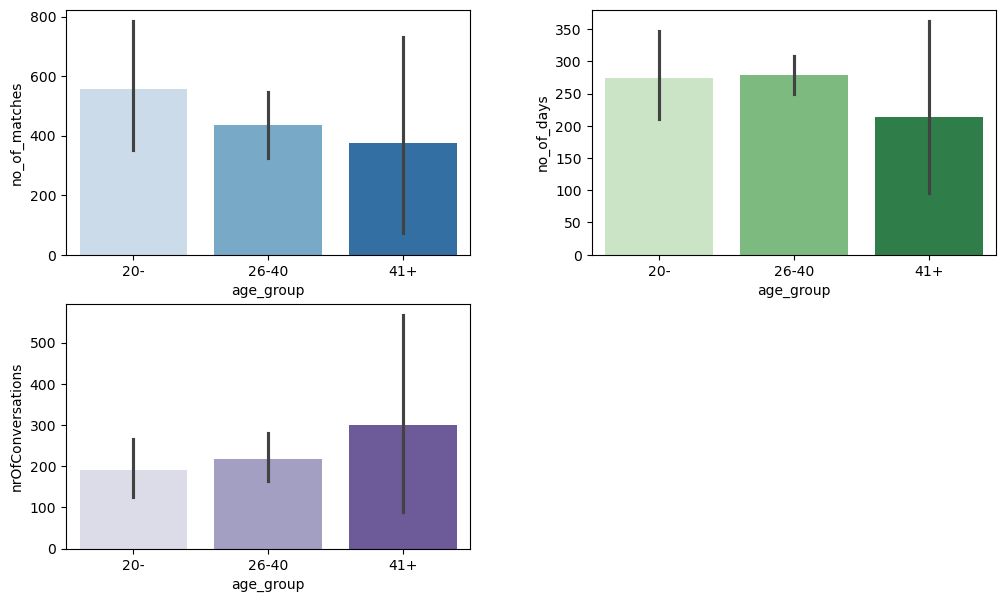

In [222]:
fig, ax = plt.subplots(2,2, figsize = (12,7))
plt.subplots_adjust(wspace = 0.3)
dating_df['age_group'] = pd.cut(dating_df['user_age'],bins=[20, 21, 40, 100],  labels=['20-', '26-40', '41+'])
sns.barplot(dating_df, x ='age_group', y= 'no_of_matches' ,palette = 'Blues', ax = ax[0,0])
sns.barplot(dating_df, x ='age_group', y= 'no_of_days',palette = 'Greens', ax = ax[0,1])
sns.barplot(dating_df, x ='age_group', y= 'nrOfConversations', palette = 'Purples', ax = ax[1,0])
ax[1, 1].axis('off')
plt.show()

#### מסקנה שניה: 
הגיל בהחלט בעל השפעה נמוכה מהמצופה על רמת 'ההצלחה' באפליקציה. 

ניתן לראות בהחלט שככל שהגיל עולה מתקיימות יותר שיחות לאחר התאמה ראשונית ואילו כמות הימים של השימוש באפליקציה קטן עם הגיל, אמנם לא בצורה משמעותית

## Ghosting 
<div> <img src="https://arts.eu/fileadmin/_processed_/d/7/csm_KW37_Header_0bcc89649e.png" width="200"/> </div>

In [226]:
dating_df ['continued_conversations']= dating_df ['nrOfConversations'] - dating_df ['nrOfGhostingsAfterInitialMessage']

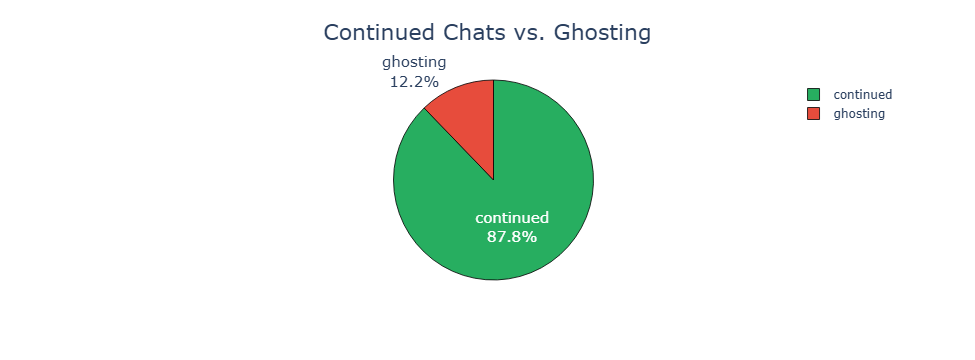

In [228]:
import pandas as pd
import plotly.express as px

stat = dating_df[['nrOfGhostingsAfterInitialMessage', 'continued_conversations']].sum()
stat.index = ['ghosting', 'continued'] 
stat_df = stat.reset_index()
stat_df.columns = ['Type', 'Count']

fig = px.pie(stat_df,names='Type',values='Count',color='Type',color_discrete_map={'continued': '#27ae60','ghosting': '#e74c3c'})

fig.update_traces(textinfo='label+percent', textfont_size=15, marker=dict(line=dict(color='black', width=0.8)))
fig.update_layout(title='Continued Chats vs. Ghosting',title_x=0.5,title_font_size=22,margin=dict(t=80))
fig.show()

In [230]:
filtered_ghosting = dating_df[(dating_df['nrOfGhostingsAfterInitialMessage'] != 0) &(dating_df['country'] != 'unknown')]

max_country = filtered_ghosting['country'].value_counts().idxmax()
max_country_count = filtered_ghosting['country'].value_counts().max()

max_gender = filtered_ghosting['gender'].value_counts().idxmax()
max_gender_count = filtered_ghosting['gender'].value_counts().max()

max_age = filtered_ghosting['age_group'].value_counts().idxmax()
max_age_count = filtered_ghosting['age_group'].value_counts().max()

total_country = dating_df[dating_df['country'] == max_country].shape[0]
total_gender = dating_df[dating_df['gender'] == max_gender].shape[0]
total_age = dating_df[dating_df['age_group'] == max_age].shape[0]

max_values = pd.DataFrame({'category': ['country', 'gender', 'age_group'],
                    'max value': [max_country, max_gender, max_age],
                    'ghosting_count': [max_country_count, max_gender_count, max_age_count],
                    'total amount': [total_country, total_gender, total_age]})

max_values

,category,max value,ghosting_count,total amount
0,country,USA,183,227
1,gender,M,415,1059
2,age_group,26-40,298,738


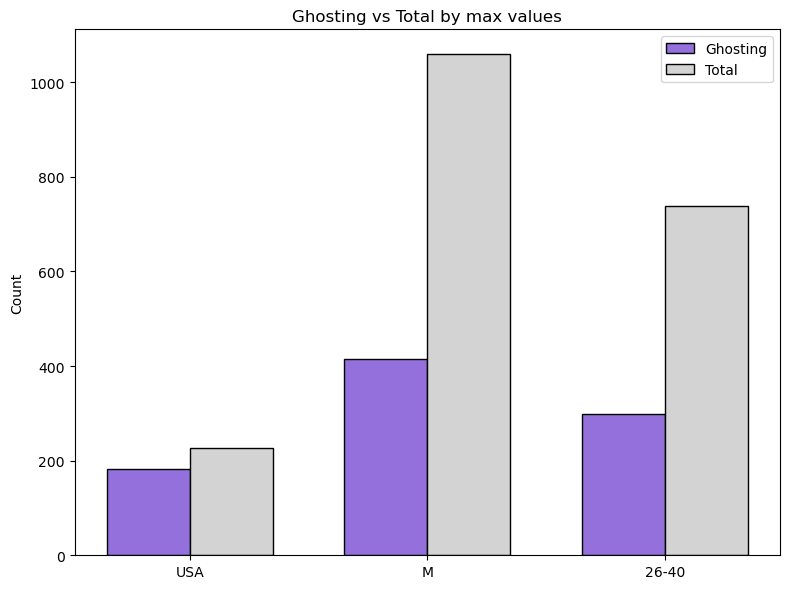

In [199]:
import numpy as np
max_values = pd.DataFrame({'category': ['country', 'gender', 'age_group'],
                    'max value': ['USA', 'M', '26-40'], 
                    'ghosting_count': [183, 415, 298],    
                    'total amount': [227, 1059, 738] })     

x = np.arange(len(tab)) 
width = 0.35  

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, tab['ghosting_count'], width, label='Ghosting', color='mediumpurple',  edgecolor='black')
plt.bar(x + width/2, tab['total amount'], width, label='Total', color='lightgrey', edgecolor='black')

plt.xticks(x, tab['max value']) 
plt.ylabel('Count')
plt.title('Ghosting vs Total by max values')
plt.legend()

plt.tight_layout()
plt.show()

#### מסקנה שלישית: 
ארהב היא המדינה בעלת כמות המשתמשים הגדולה ביותר שעושים גוסטינג, ניתן לראות כי מדובר ברוב המוחלט. 

גברים עושים יותר גוסטינג מנשים, כמעט מחצי הגברים מתוך אוכלוסיית הגברים באפליקציה עושים גוסטינג.

קבוצת הגילאים בעלת כמות הגוסטינג הגבוהה ביותר היא בין 26-40, כמעט מחצי מאוכלוסיית המשתמשים באותה שכבת גיל עושים גוסטינג. 
